# Shor's Algorithm
Finding prime factors of large numbers

In [1]:
import numpy as np

from qiskit.aqua.algorithms import Shor
from qiskit.aqua import QuantumInstance
from qiskit import QuantumCircuit, Aer, execute
from qiskit.tools.visualization import plot_histogram

In [2]:
backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1000)
my_shor = Shor(N=15, a=2, quantum_instance=quantum_instance)

In [3]:
Shor.run(my_shor)
# same as: my_shor.run()

{'factors': [[3, 5]], 'total_counts': 60, 'successful_counts': 17}

In [4]:
def c_amod15(a, power):
    U = QuantumCircuit(4)
    for iteration in range(power):
        U.swap(2, 3)
        U.swap(1, 2)
        U.swap(0, 1)
        for q in range(4):
            U.x(q)
    U = U.to_gate()
    U.name = '%i^%i mod 15' % (a, power)
    c_U = U.control()
    return c_U

In [5]:
n_count = 8
a = 7

In [6]:
def qft_dagger(n):
    qc = QuantumCircuit(n)
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cu1(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = 'QFT dagger'
    return qc

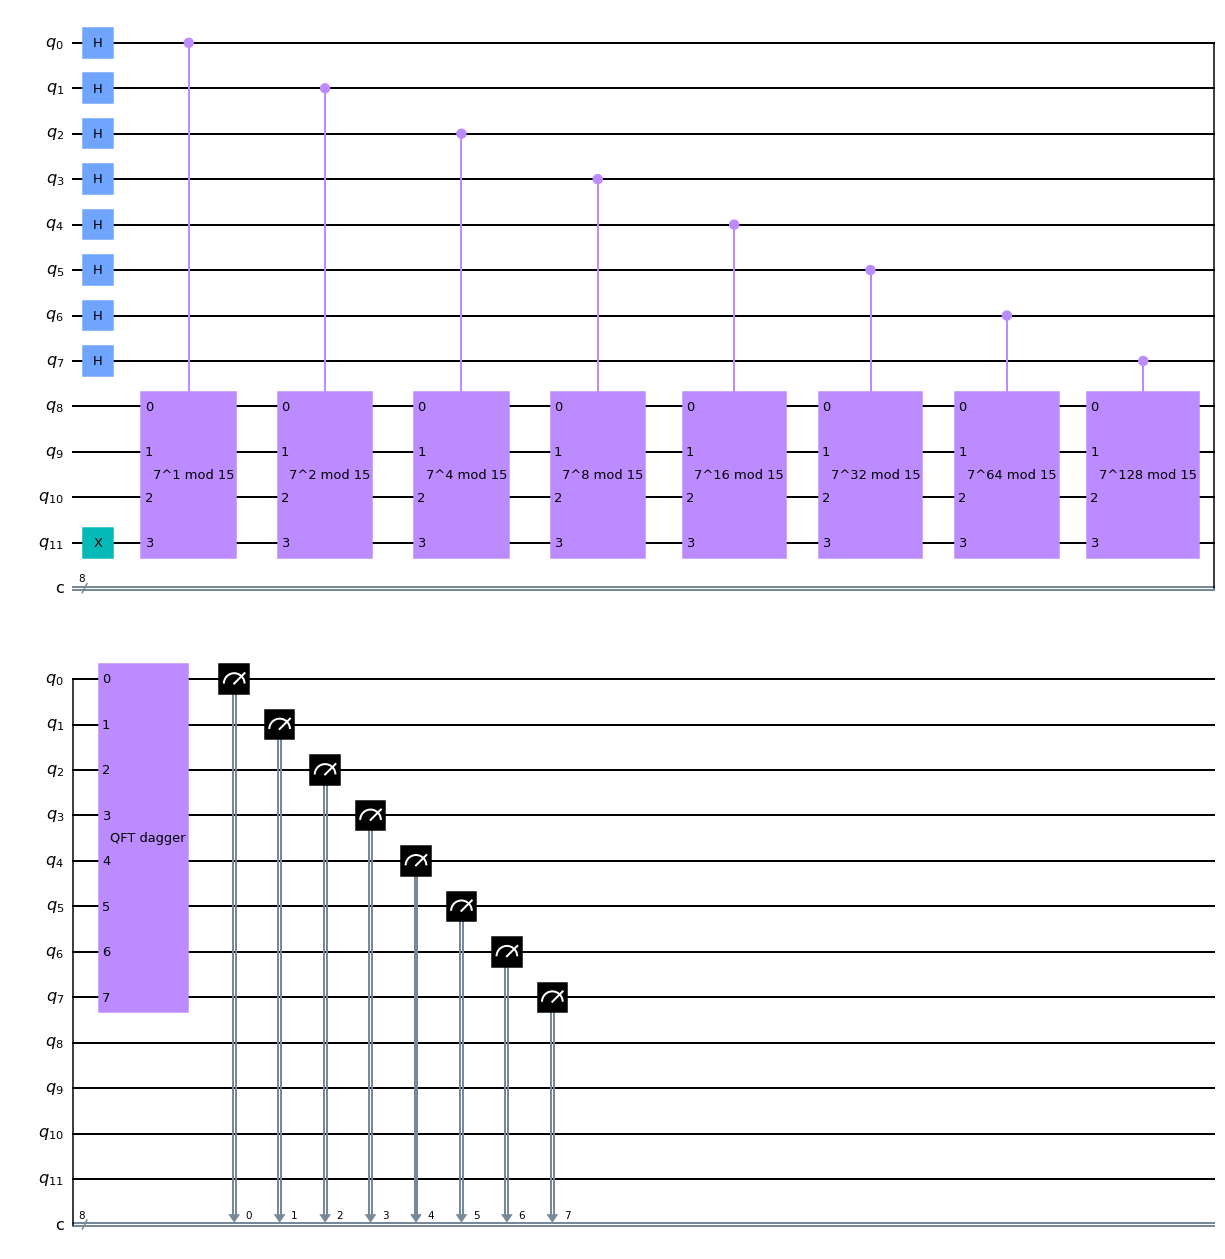

In [7]:
qc = QuantumCircuit(n_count+4, n_count)

for q in range(n_count):
    qc.h(q)

qc.x(n_count+3)

for q in range(n_count):
    qc.append(c_amod15(a, 2**q), [q]+[i+n_count for i in range(4)])

qc.append(qft_dagger(n_count), range(n_count))

qc.measure(range(n_count), range(n_count))

qc.draw(output='mpl')


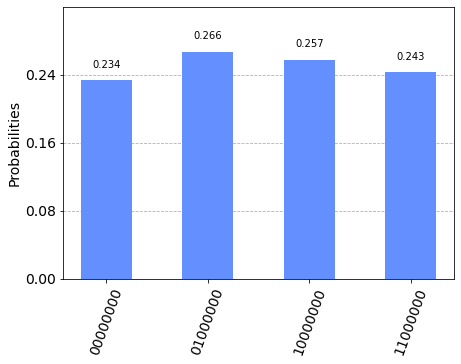

In [8]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=2048).result()
counts = result.get_counts()
plot_histogram(counts)